<a href="https://colab.research.google.com/github/PyCharger/GBC_homeworks/blob/Homeworks/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

In [ ]:
df1 = pd.read_excel("C:\\Users\\Danila\\Downloads\\Telegram Desktop\\dataset1.xlsx")
df2 = pd.read_excel("C:\\Users\\Danila\\Downloads\\Telegram Desktop\\dataset2.xlsx")
df3 = pd.read_excel("C:\\Users\\Danila\\Downloads\\Telegram Desktop\\dataset3.xlsx")
df4 = pd.read_excel("C:\\Users\\Danila\\Downloads\\Telegram Desktop\\dataset4.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4])
df.head(20)

,Anime,Rate,Text
0,Нежный укус / Amagami SS,Нейтральный,"после первой арки несколько разочаровался, ожи..."
1,Легенда о легендарных героях / Densetsu no Yuu...,Положительный,"Концовка какая-то мутная, ничего не понял. Над..."
2,Мобильный воин Гандам: Единорог / Kidou Senshi...,Положительный,"Что тут сказать? Никакого сравнени я с Seed, х..."
3,Невиданный цветок / Ano Hi Mita Hana no Namae ...,Положительный,Только что досмотрел и меня переполняют эмоции...
4,Принцесса-медуза / Kuragehime,Положительный,"И правда не оторваться. Но, по-моему, то, что ..."
5,Легенда о легендарных героях / Densetsu no Yuu...,Положительный,"Отличное аниме, пошло на ура и это при том, чт..."
6,С его стороны — с её стороны / Kareshi Kanojo ...,Отрицательный,"Мне очень нравилось первые серий 10-15, но зат..."
7,Псы: Пули и резня / Dogs: Bullets & Carnage,Положительный,"Манга многим круче, особенно основная история!..."
8,Звёздное небо / Starry☆Sky,Отрицательный,"Довольно приятное, но, к сожалению, одноразово..."
9,Сказания Земноморья / Ged Senki,Положительный,Весь просмотр терзал вопрос: а где же драконы?...


In [ ]:
import string


def antidog(str):
    str = str.split()
    str_new = [x for x in str if not x.startswith("@")]
    return ' '.join(str_new)
def cleaning(x):
    x = re.sub(r'\W',' ', x)
    x = x.split()
    x_new = [w.lower() for w in x if not re.match(r'[A-Z]+', w, re.I)]
    x_new = [w for w in x_new if not re.match(r'\d', w)]
    return ' '.join(x_new)

df['Text'] = df['Text'].apply(str)

In [ ]:
df['Text'] = df['Text'].apply(antidog)
df['Text'] = df['Text'].apply(cleaning)
df['Text'][1]

1    концовка какая то мутная ничего не понял надею...
1    мною просмотреномоя оценка из шедеврв общем то...
1    ну будем честными сериал не говно полное но и ...
1    эта история будет продалжаться вечно с такими ...
Name: Text, dtype: object

In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def reorganize(x):
    tokens = word_tokenize(x, language="russian")
    tokens = [token for token in tokens if token not in stopwords.words("russian")]
    return ' '.join(tokens)


In [ ]:
df['Text'] = df['Text'].apply(reorganize)
df['Text']

0        первой арки несколько разочаровался ожидал бол...
1        концовка мутная понял надеюсь второй сезон сам...
2        сказать никакого сравнени пытается подражать б...
3        досмотрел переполняют эмоции шедевр затягивает...
4        правда оторваться моему медузе серий езмъ плюс...
                               ...                        
15423    просмотрел серии пожирателя звёзд дня могу отм...
15424    сильно заинтригован аниме поглощающая звезды д...
15425    докатились просмотра чуда добавила избранное б...
15426    вокруг произведения собралось достаточное коли...
15427    скитания параллельном мире это легкая повседне...
Name: Text, Length: 73216, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['Rate'] = df['Rate'].replace({'Положительный': 1, 'Нейтральный': 0, 'Отрицательный': -1})
df['Rate']

0        1
1        2
2        2
3        2
4        2
        ..
15423    2
15424    2
15425    1
15426    2
15427    2
Name: Rate, Length: 73216, dtype: int64

In [ ]:
list_corpus = df['Text'].tolist()
list_labels = df['Rate'].tolist()
X_train, X_test, y_train, y_test = train_test_split(list_corpus,
                                                    list_labels,
                                                    test_size=0.2,
                                                    random_state=40)

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_tfidf

<58572x327334 sparse matrix of type '<class 'numpy.float64'>'
	with 6286354 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test, y_pred, labels = [-1, 0, 1]).ravel()

array([1091,  982, 1459,  316, 1504, 3243,  102,  898, 5049], dtype=int64)

In [ ]:
f1_score(y_test,y_pred, average=None)

array([0.43285062, 0.35610276, 0.63911392])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf.fit(X_train_tfidf,
            y_train, eval_set=[(X_train_tfidf, y_train), (X_test_tfidf, y_test)])

[0]	validation_0-merror:0.53415	validation_0-mlogloss:1.07225	validation_1-merror:0.54964	validation_1-mlogloss:1.07599
[1]	validation_0-merror:0.52317	validation_0-mlogloss:1.05300	validation_1-merror:0.54446	validation_1-mlogloss:1.06064
[2]	validation_0-merror:0.51059	validation_0-mlogloss:1.03809	validation_1-merror:0.54090	validation_1-mlogloss:1.04914
[3]	validation_0-merror:0.50058	validation_0-mlogloss:1.02575	validation_1-merror:0.53093	validation_1-mlogloss:1.03990
[4]	validation_0-merror:0.49169	validation_0-mlogloss:1.01521	validation_1-merror:0.52697	validation_1-mlogloss:1.03328
[5]	validation_0-merror:0.48711	validation_0-mlogloss:1.00624	validation_1-merror:0.52151	validation_1-mlogloss:1.02661
[6]	validation_0-merror:0.47977	validation_0-mlogloss:0.99784	validation_1-merror:0.51639	validation_1-mlogloss:1.02126
[7]	validation_0-merror:0.47326	validation_0-mlogloss:0.99026	validation_1-merror:0.51284	validation_1-mlogloss:1.01599
[8]	validation_0-merror:0.46833	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test_tfidf)

In [ ]:
confusion_matrix(y_test,y_pred, labels = [0,1,2]).ravel()

array([1703, 1053,  776,  685, 2081, 2297,  322, 1436, 4291], dtype=int64)

In [ ]:
f1_score(y_test,y_pred,average = None)

array([0.54565844, 0.43205647, 0.63982703])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
individual_tree = rfc.estimators_[0]

IndexError: row index (175992) out of range

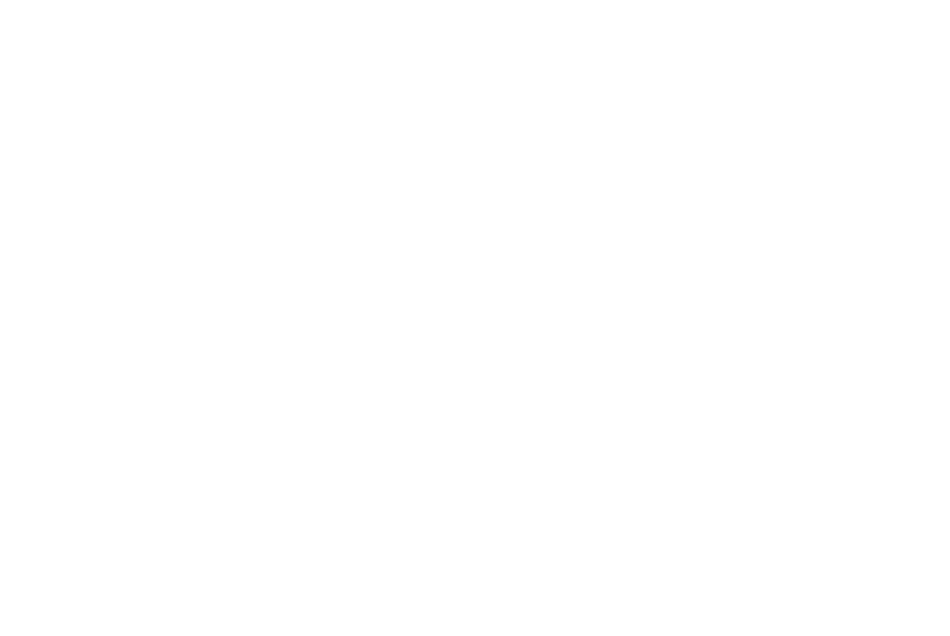

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(individual_tree, feature_names=X_train_tfidf, class_names=y_train, filled=True)
plt.show()